#Setup

In [2]:
# Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!ls

'Copy for Victor - ResNet50V2_CIFAR10.ipynb'	   ResNet50V2_CIFAR100.ipynb
'Copy of Ding ResNet50V2_CIFAR100.ipynb'	   ResNet50V2_CIFAR10.ipynb
'Copy of ErJunFootball ResNet50V2_CIFAR10.ipynb'   Results
'Copy of Michael ResNet50V2_CIFAR100.ipynb'	   TODO.gdoc
'Copy of Stella ResNet50V2_CIFAR10.ipynb'	   VGG19_CIFAR100.ipynb
'Copy of Tony ResNet50V2_CIFAR100.ipynb'	   VGG19_CIFAR10.ipynb
 Data						   vm-private-key.ppk
 data_visualization.ipynb			   vm-public-key
 load_datasets.ipynb				  'VM ResNet50V2_CIFAR10.ipynb'
 Papers						   WILLIAM
 Plots						  'Work Distribution.gdoc'
 pytorch_cifar.ipynb				   Xception_CIFAR100.ipynb
'Research Paper.gdoc'				   Xception_CIFAR10.ipynb


In [0]:
# Navigate to folder containing project
import os
os.chdir("/content/drive/My Drive/COMP 551 Project 4/Results/VGG19CIFAR100_200EPOCHS")

In [12]:
!unzip cifar100-20191214T181928Z-001.zip

Archive:  cifar100-20191214T181928Z-001.zip
   creating: cifar100/_ipynb_checkpoints/
  inflating: cifar100/log_lr0.1_bs160.txt  
  inflating: cifar100/log_lr0.1_bs224.txt  
  inflating: cifar100/log_lr0.1_bs192.txt  
  inflating: cifar100/log_lr0.1_bs256.txt  
  inflating: cifar100/missing results.txt  
  inflating: cifar100/log_lr0.1_bs320.txt  


#VGG19 on CIFAR 100


In [0]:
# Import datasets directly from keras 
from keras.datasets import cifar100
from keras.applications.vgg19 import VGG19
from keras import optimizers
from keras.layers import Input
from keras.callbacks import CSVLogger

Using TensorFlow backend.


In [0]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [0]:
from google.colab.patches import cv2_imshow
# Function to show a single image 
def show_single_picture(img):
    """ Plot an image """
    cv2_imshow(img*255)

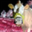

In [0]:
# Peek image
show_single_picture(x_train[0])

In [0]:
# Save data properties 
img_size = x_train[0].shape[0]
num_channels = x_train[0].shape[2]

In [0]:
# Experimental data
EPOCHS = 50
WARMUP = 10
WARMUP_LR = 0.1
batch_sizes = [16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288, 304, 320]
bs_simplified = [16, 32, 64, 96, 128, 160, 192, 224, 256, 320]
# bs = bs_simplified[0]
learning_rates =  [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20]
lr_simplified = [0.01, 0.02, 0.03, 0.05, 0.075, 0.10, 0.12, 0.15, 0.18, 0.20]
lr = lr_simplified[4]

In [0]:
# Looping over batch sizes using fixed learning rate 
for batch_size in bs_simplified:
  print("Batch Size: {}\nLearning Rate: {}".format(batch_size, lr))
  # Create ResNet model
  vgg = VGG19(weights=None, include_top=True, input_shape=(img_size,img_size,num_channels))
   
  # Compile the model (should be done ***after*** setting layers to non-trainable)
  vgg.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

  # Print a summary of the model
  vgg.summary()

  # Customize SGD optimizer with Generalization Bound 
  sgd = optimizers.SGD(lr=lr, momentum=0.0, nesterov=False)

  # Create a CSV Logger
  csv_logger = CSVLogger("Results/VGG19CIFAR100/batch_size{}_learning_rate{}.csv".format(batch_size, lr), separator=',', append=False)

  # Train ResNet using fix learning rate for multiple batch size 
  history = vgg.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),batch_size=batch_size, epochs=EPOCHS, verbose=1, use_multiprocessing=True, callbacks=[csv_logger])

Batch Size: 16
Learning Rate: 0.075
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D